In [1]:
from nlp import load_dataset
import pandas as pd

/home/daksenov/miniconda2/envs/summ/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/daksenov/miniconda2/envs/summ/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/daksenov/miniconda2/envs/summ/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/daksenov/miniconda2/envs/summ/lib/pyt

In [2]:
#Check is the article about Coronavirus
def about_corona(text):
    covid_terms = ['corona','Corona','CORONA','covid','Covid','COVID']
    for term in covid_terms:
        if term in text:
            return 1
    return 0

In [3]:
#Load data
savefolder = 'data/'
dataset = load_dataset(savefolder+'de_politik_news.py',cache_dir=savefolder+'.de-politic-news')

Using custom data configuration default


In [4]:
#Filter articles not from 2020
dataset_2020 = dataset['train'].filter(lambda inst: inst['date'] != '' 
                                       and int(inst['date'].split('-')[0]) ==2020 
                                       and int(inst['date'].split('-')[1]) <8)

In [5]:
#Find articles about Corona
dataset_corona = dataset_2020.map(lambda inst: {'corona': about_corona(inst['text'])})
df = pd.DataFrame({'corona': dataset_corona['corona'], 'datetime': pd.to_datetime(dataset_corona['date'])})
df['not_corona'] = 1- df['corona']

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import NullFormatter
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('dark_background')


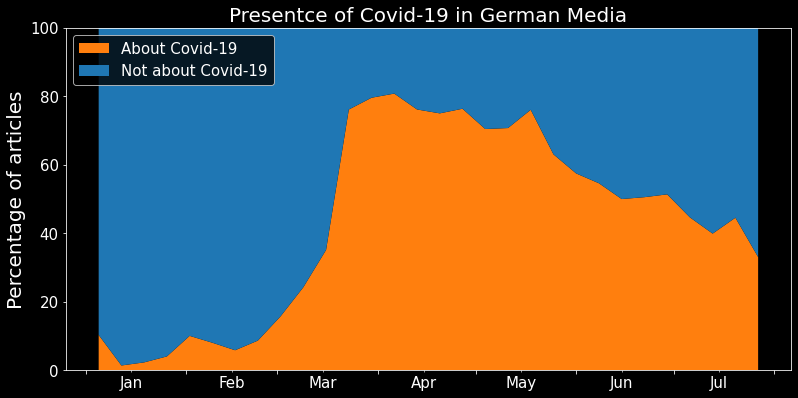

In [16]:
df_grouped = df.set_index('datetime').groupby(pd.Grouper(freq='w')).sum()
def draw_plot(df_grouped):
    data = df_grouped.to_numpy().T
    data = 100 * data / data.sum(axis=0)
    months = df_grouped.index.to_numpy().T.astype('M8[ms]').astype('O')
    #months = [day.date() for day in months]
    
    fig, ax = plt.subplots(figsize=(13, 7))

    ax.stackplot(months, data, labels=['About Covid-19', 'Not about Covid-19'],colors=['tab:orange','tab:blue'])
    ax.set_title('Presentce of Covid-19 in German Media', size=20)
    ax.legend(loc='upper left',fontsize=15)
    ax.set_ylabel('Percentage of articles',size=20)
    ax.set_ylim(ymin=0, ymax=100)
    #ax.set_xlim([months[0], months[-1]])
    #ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2021, 7, 31)])

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
    
    ax.tick_params(which='minor', axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)

    plt.gcf().autofmt_xdate()
#with plt.style.context('fivethirtyeight'):
draw_plot(df_grouped)